In [2]:
import pandas as pd

C:\Users\johna\AppData\Local\Temp\ipykernel_20280\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('housing.data', header=None, sep='\s+')
#Los datos estan mal acomodados por default, entonces tenemos que darle un header y separar los datos por espacios

data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


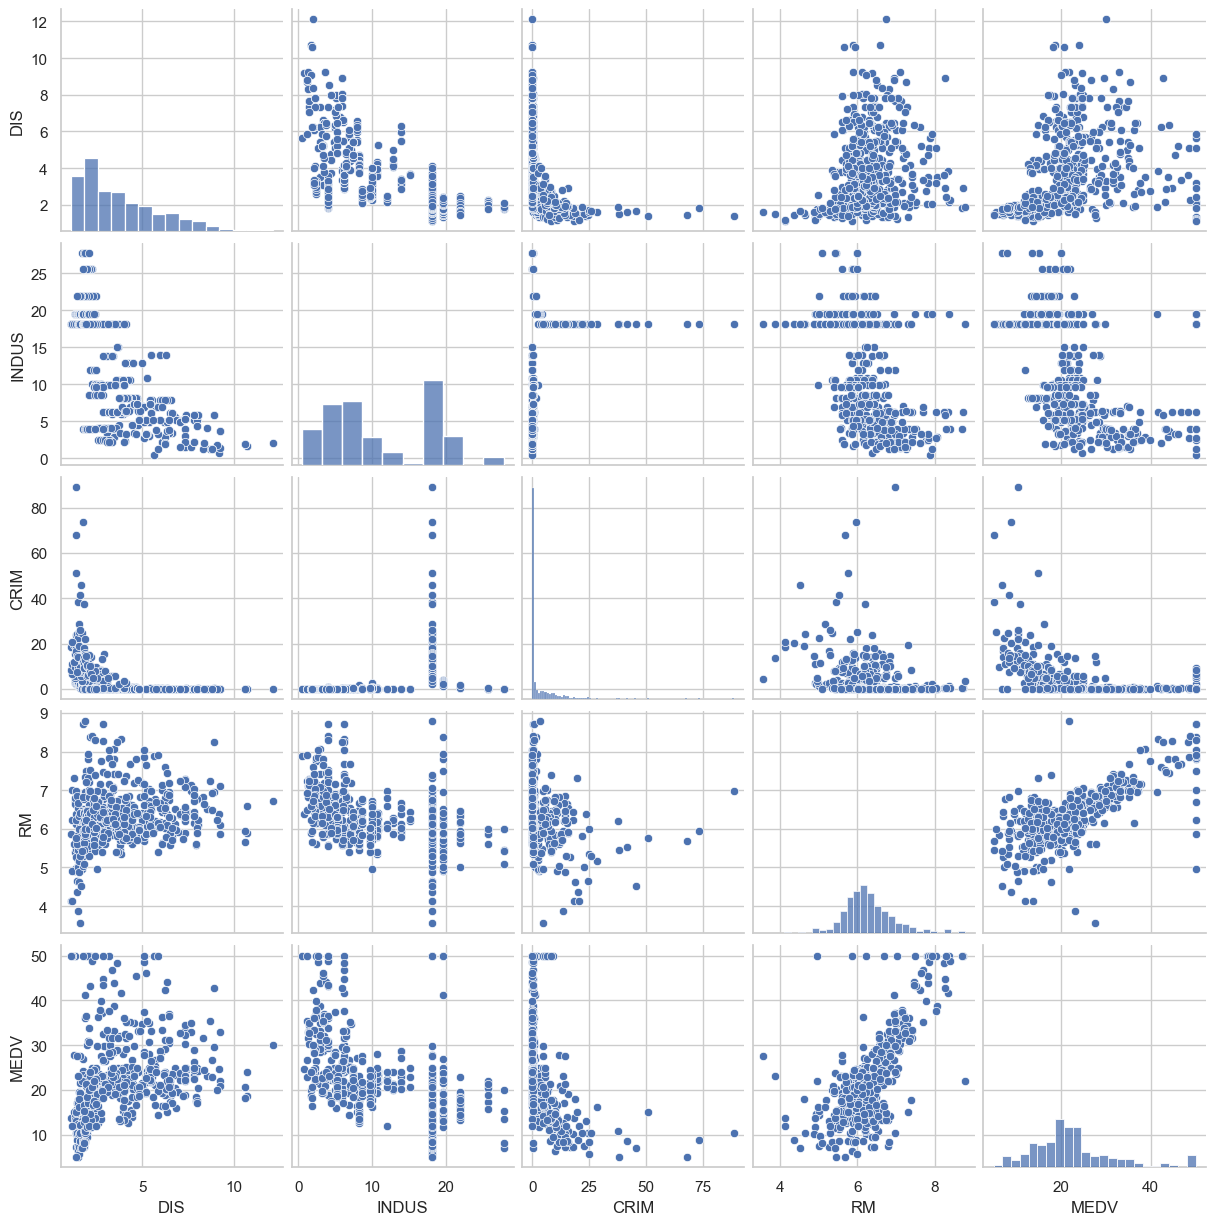

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style='whitegrid', context='notebook')
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

sns.pairplot(data[cols], height=2.5)
plt.show()

Lo siguiente es calcular las correlaciones entre las variables, podemos usar un heat map para esto, sin embargo necesitamos numpy para calcular las correlaciones.

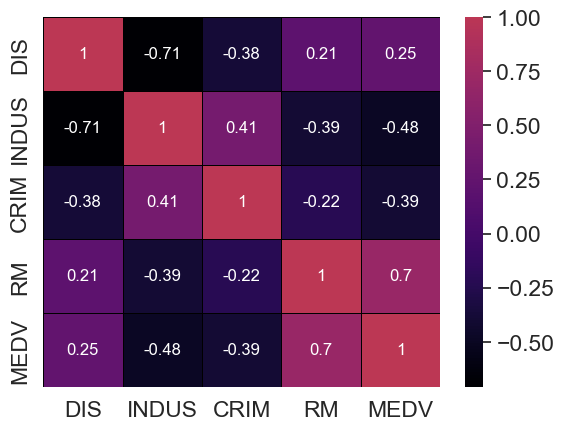

In [6]:
import numpy as np

#ESTA ES UNA FORMA CON NUMPY
#cm = np.corrcoef(data[cols].values.T) #aqui calculamos la correlacion de las columnas


#ESTA FORMA ES MAS CONCISA Y SIN IMPORTAR NUMPY
cm = data[cols].corr() 

#estlizamos un poquito para que se logre ver bien

sns.set(font_scale=1.5)

sns.heatmap(
    cm,
    annot=True,
    cmap='inferno',
    center=1,
    linewidths=0.5,
    linecolor='black',
    yticklabels=cols,
    xticklabels=cols,
    annot_kws={"size":12},
    cbar=True
)

plt.show()


Recordemos que entre mas alto el valor, mas correlacionado esta, osea esta mejor

### Tenemos que crear el modelo con las variables independientes y la variable dependiente. 

In [10]:
from sklearn import linear_model

#Aqui se crea un "creador de modelos" para hacer la regresion aun sin pasarle los datos.
regresion = linear_model.LinearRegression()

interaction = data[["RM", "INDUS"]].values

modelo = regresion.fit(interaction, data["MEDV"])

Y_pred = regresion.predict(interaction)

Y_pred

array([27.75850755, 24.96067296, 30.93672306, 31.11074967, 32.27623588,
       26.66782236, 21.49368131, 22.74521012, 18.51347831, 21.43110486,
       24.34873142, 21.47021514, 20.53156853, 20.91051908, 22.06036118,
       20.01098275, 20.80101031, 21.23122334, 17.05424591, 19.17402285,
       17.9459602 , 21.03567197, 22.42017572, 19.84671959, 20.71496771,
       18.17279979, 19.84671959, 21.67708048, 25.18136117, 26.58150904,
       19.06451408, 21.87263186, 20.91834114, 18.97064942, 22.06036118,
       21.51504248, 20.79541341, 20.8658119 , 21.7731703 , 27.70073176,
       31.05639341, 27.74412441, 23.04306929, 23.3715956 , 22.26086378,
       19.23372845, 20.04722218, 21.95580363, 17.02008685, 18.60796404,
       21.85681257, 23.04576495, 26.14329878, 22.1305845 , 21.81908922,
       33.39541083, 26.78217377, 29.97498958, 23.45113069, 21.74592267,
       20.29102042, 22.05098282, 25.88378983, 28.27733869, 32.20765862,
       25.17442512, 21.2399314 , 21.04801092, 18.82654727, 21.10

### Tenemos que analizar ahora los datos y graficarlos en un plano 3D.

C:\Users\johna\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


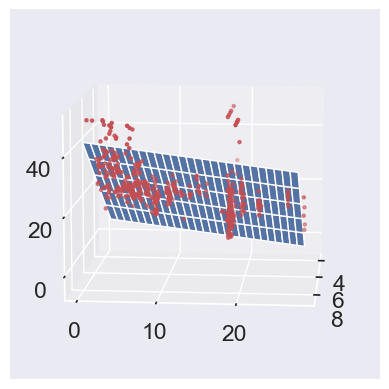

In [43]:
from mpl_toolkits.mplot3d import * #Esta libreria nos permitira hacer el plano

#Con esto delimitamos la malla para que no vaya de -infinito hasta +infinito
x1_range = np.arange(data["RM"].min(), data["RM"].max())
x2_range = np.arange(data["INDUS"].min(), data["INDUS"].max())

#Numpy tiene ya una funcion que permite crear esta malla
X1, X2 = np.meshgrid(x1_range, x2_range)#Con esto se crea una malla con todas estas variables

#Ahora tenemos que crear el plano
plano = pd.DataFrame({"RM":X1.ravel(), "INDUS":X2.ravel()}) #ravel lo que hace es poner en 1 dimension X1 y X2 para que sea mas facil para numpy manejarlos

pred = modelo.predict(plano).reshape(X1.shape)

# fig = plt.figure()
# ax = fig.gca(projection="3d")
# ax.plot_surface(X1, X2, pred, alpha=0.4)
# ax.scatter3D(data["RM"], data["INDUS"], data["MEDV"], color="R", marker=".")

# plt.show()

fig = plt.figure()

# Agregar un nuevo eje tridimensional a la figura
ax = fig.add_subplot(111, projection='3d')

# Visualizar el plano y los datos
ax.plot_surface(X1, X2, pred, alpha=0.9)
ax.scatter3D(data["RM"], data["INDUS"], data["MEDV"], color="r", marker=".")
ax.view_init(elev=10, azim=5)
# Mostrar la figura
plt.show()

In [46]:
print(f"El precio de una casa de {5} habitaciones en Boston es de ", modelo.predict(5))

ValueError: Expected 2D array, got scalar array instead:
array=5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
num_habitaciones = [[5]]

print(f"El precio de una casa de {num_habitaciones[0][0]} habitaciones en Boston es de ", modelo.predict(num_habitaciones))

El precio de una casa de 5 habitaciones en Boston es de  [10.83992413]
